In [1]:
# 1. Импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, roc_auc_score, roc_curve, 
    precision_score, recall_score, f1_score, 
    confusion_matrix, classification_report
)

# Настройка отображения
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option('display.max_columns', None)

In [2]:
# 2. Загрузка данных
# URL датасета (указан в задании)
dataset_url = "https://raw.githubusercontent.com/Ilya190206/aie-group/refs/heads/main/homeworks/HW05/S05-hw-dataset.csv"

# Загрузка данных
df = pd.read_csv(dataset_url)

# Проверка загрузки
print("✅ Данные успешно загружены!")
print(f"Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов")
print("\nПервые 5 строк датасета:")
display(df.head())

✅ Данные успешно загружены!
Размер датасета: 3000 строк, 17 столбцов

Первые 5 строк датасета:


,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [3]:
# 3. Первичный анализ данных
print("=" * 60)
print("3.1. ИНФОРМАЦИЯ О ДАТАСЕТЕ")
print("=" * 60)
print("\nОбщая информация (info):")
df.info()

print("\n" + "=" * 60)
print("3.2. БАЗОВЫЕ СТАТИСТИКИ")
print("=" * 60)
print("\nОписательные статистики для числовых признаков:")
display(df.describe())

# Проверка на пропуски
print("\n" + "=" * 60)
print("3.3. ПРОВЕРКА НА ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ")
print("=" * 60)
missing_values = df.isnull().sum()
print("Пропущенные значения по колонкам:")
print(missing_values[missing_values > 0])
if missing_values.sum() == 0:
    print("✅ Пропущенных значений нет!")

3.1. ИНФОРМАЦИЯ О ДАТАСЕТЕ

Общая информация (info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-n

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000



3.3. ПРОВЕРКА НА ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ
Пропущенные значения по колонкам:
Series([], dtype: int64)
✅ Пропущенных значений нет!



4. АНАЛИЗ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ (default)
Распределение классов:
  default = 0 (нет дефолта): 58.97% (1769 наблюдений)
  default = 1 (дефолт):      41.03% (1231 наблюдений)


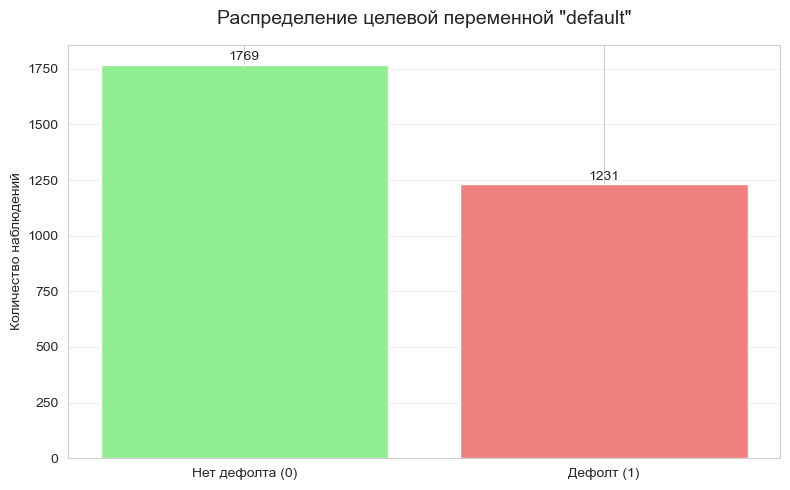

In [18]:
# 4. Анализ целевой переменной
print("\n" + "=" * 60)
print("4. АНАЛИЗ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ (default)")
print("=" * 60)

# Распределение классов
target_dist = df['default'].value_counts(normalize=True)
print("Распределение классов:")
print(f"  default = 0 (нет дефолта): {target_dist[0]:.2%} ({df[df['default']==0].shape[0]} наблюдений)")
print(f"  default = 1 (дефолт):      {target_dist[1]:.2%} ({df[df['default']==1].shape[0]} наблюдений)")

# Визуализация распределения
plt.figure(figsize=(8, 5))
bars = plt.bar(['Нет дефолта (0)', 'Дефолт (1)'], 
               df['default'].value_counts().values,
               color=['lightgreen', 'lightcoral'])
plt.title('Распределение целевой переменной "default"', fontsize=14, pad=15)
plt.ylabel('Количество наблюдений')
plt.grid(axis='y', alpha=0.3)

# Добавление значений на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig(os.path.join(figures_path, 'target_distribution.png'), dpi=150, bbox_inches='tight')
plt.show()

In [19]:
# 5. Подготовка признаков и таргета
print("\n" + "=" * 60)
print("5. ПОДГОТОВКА ПРИЗНАКОВ И ТАРГЕТА")
print("=" * 60)

# Исключаем client_id из признаков (это только технический идентификатор)
X = df.drop(columns=['default', 'client_id'])
y = df['default']

print(f"Размер матрицы признаков X: {X.shape}")
print(f"Размер целевого вектора y: {y.shape}")
print(f"\nИспользуемые признаки ({X.shape[1]} шт.):")
for i, col in enumerate(X.columns, 1):
    print(f"  {i:2d}. {col}")

# Проверка типов данных
print("\nПроверка типов данных:")
print(X.dtypes.value_counts())
print("\nВсе признаки числовые - преобразование не требуется.")


5. ПОДГОТОВКА ПРИЗНАКОВ И ТАРГЕТА
Размер матрицы признаков X: (3000, 15)
Размер целевого вектора y: (3000,)

Используемые признаки (15 шт.):
   1. age
   2. income
   3. years_employed
   4. credit_score
   5. debt_to_income
   6. num_credit_cards
   7. num_late_payments
   8. has_mortgage
   9. has_car_loan
  10. savings_balance
  11. checking_balance
  12. region_risk_score
  13. phone_calls_to_support_last_3m
  14. active_loans
  15. customer_tenure_years

Проверка типов данных:
int64      13
float64     2
Name: count, dtype: int64

Все признаки числовые - преобразование не требуется.


In [20]:
# 6. Разделение на train/test
print("\n" + "=" * 60)
print("6. РАЗДЕЛЕНИЕ НА ОБУЧАЮЩУЮ И ТЕСТОВУЮ ВЫБОРКИ")
print("=" * 60)

# Разделение с сохранением баланса классов
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25,          # 25% на тест
    random_state=42,         # Для воспроизводимости
    stratify=y               # Сохраняем распределение классов
)

print(f"Размер обучающей выборки: {X_train.shape[0]} наблюдений")
print(f"Размер тестовой выборки: {X_test.shape[0]} наблюдений")

# Проверяем распределение классов
print("\nРаспределение классов в обучающей выборке:")
train_dist = y_train.value_counts(normalize=True)
print(f"  default = 0: {train_dist[0]:.2%}")
print(f"  default = 1: {train_dist[1]:.2%}")

print("\nРаспределение классов в тестовой выборке:")
test_dist = y_test.value_counts(normalize=True)
print(f"  default = 0: {test_dist[0]:.2%}")
print(f"  default = 1: {test_dist[1]:.2%}")


6. РАЗДЕЛЕНИЕ НА ОБУЧАЮЩУЮ И ТЕСТОВУЮ ВЫБОРКИ
Размер обучающей выборки: 2250 наблюдений
Размер тестовой выборки: 750 наблюдений

Распределение классов в обучающей выборке:
  default = 0: 58.98%
  default = 1: 41.02%

Распределение классов в тестовой выборке:
  default = 0: 58.93%
  default = 1: 41.07%


In [21]:
# 7. Бейзлайн-модель (DummyClassifier)
print("\n" + "=" * 60)
print("7. БЕЙЗЛАЙН-МОДЕЛЬ (DummyClassifier)")
print("=" * 60)

# Создаем бейзлайн модель (предсказывает самый частый класс)
dummy_model = DummyClassifier(strategy="most_frequent", random_state=42)

# Обучаем модель
dummy_model.fit(X_train, y_train)

# Делаем предсказания
y_pred_dummy = dummy_model.predict(X_test)
# Для ROC-AUC нужны вероятности (у DummyClassifier тоже есть predict_proba)
y_pred_proba_dummy = dummy_model.predict_proba(X_test)[:, 1]

# Оцениваем качество
dummy_accuracy = accuracy_score(y_test, y_pred_dummy)
dummy_roc_auc = roc_auc_score(y_test, y_pred_proba_dummy)

print("Модель: DummyClassifier (предсказывает самый частый класс)")
print(f"Accuracy на тесте: {dummy_accuracy:.4f}")
print(f"ROC-AUC на тесте: {dummy_roc_auc:.4f}")
print("\nЧто делает бейзлайн-модель?")
print("  - Всегда предсказывает класс '0' (нет дефолта)")
print("  - Это самый простой и наивный подход")
print("  - Любая полезная модель должна превзойти этот результат")
print("  - Accuracy = доля класса '0' в тестовой выборке")


7. БЕЙЗЛАЙН-МОДЕЛЬ (DummyClassifier)
Модель: DummyClassifier (предсказывает самый частый класс)
Accuracy на тесте: 0.5893
ROC-AUC на тесте: 0.5000

Что делает бейзлайн-модель?
  - Всегда предсказывает класс '0' (нет дефолта)
  - Это самый простой и наивный подход
  - Любая полезная модель должна превзойти этот результат
  - Accuracy = доля класса '0' в тестовой выборке


In [22]:
# 8. Логистическая регрессия с подбором гиперпараметров
print("\n" + "=" * 60)
print("8. ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ С ПОДБОРОМ ГИПЕРПАРАМЕТРОВ")
print("=" * 60)

# Создаем пайплайн
pipe = Pipeline([
    ('scaler', StandardScaler()),           # Стандартизация признаков
    ('logreg', LogisticRegression(          # Логистическая регрессия
        max_iter=1000,                      # Увеличиваем итерации для сходимости
        random_state=42,
        solver='liblinear'                  # Подходит для небольших датасетов
    ))
])

# Параметры для GridSearch
param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],  # Параметр регуляризации
    'logreg__penalty': ['l1', 'l2']                     # Тип регуляризации
}

# Настраиваем GridSearch
print("Запуск GridSearchCV для подбора гиперпараметров...")
grid_search = GridSearchCV(
    pipe, 
    param_grid, 
    cv=5,                    # 5-кратная кросс-валидация
    scoring='roc_auc',       # Оптимизируем по ROC-AUC
    n_jobs=-1,               # Используем все ядра процессора
    verbose=1
)

# Обучаем модель с подбором параметров
grid_search.fit(X_train, y_train)

print("\n✅ Подбор гиперпараметров завершен!")
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший ROC-AUC на кросс-валидации: {grid_search.best_score_:.4f}")

# Получаем лучшую модель
best_model = grid_search.best_estimator_


8. ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ С ПОДБОРОМ ГИПЕРПАРАМЕТРОВ
Запуск GridSearchCV для подбора гиперпараметров...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

✅ Подбор гиперпараметров завершен!
Лучшие параметры: {'logreg__C': 0.1, 'logreg__penalty': 'l1'}
Лучший ROC-AUC на кросс-валидации: 0.8638


In [23]:
# 9. Оценка логистической регрессии на тестовой выборке
print("\n" + "=" * 60)
print("9. ОЦЕНКА ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ НА ТЕСТОВОЙ ВЫБОРКЕ")
print("=" * 60)

# Делаем предсказания лучшей моделью
y_pred_logreg = best_model.predict(X_test)
y_pred_proba_logreg = best_model.predict_proba(X_test)[:, 1]

# Вычисляем метрики
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_roc_auc = roc_auc_score(y_test, y_pred_proba_logreg)
logreg_precision = precision_score(y_test, y_pred_logreg)
logreg_recall = recall_score(y_test, y_pred_logreg)
logreg_f1 = f1_score(y_test, y_pred_logreg)

print("Модель: Логистическая регрессия (с подобранными гиперпараметрами)")
print(f"Accuracy на тесте: {logreg_accuracy:.4f}")
print(f"ROC-AUC на тесте: {logreg_roc_auc:.4f}")
print(f"Precision на тесте: {logreg_precision:.4f}")
print(f"Recall на тесте: {logreg_recall:.4f}")
print(f"F1-score на тесте: {logreg_f1:.4f}")

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_logreg)
cm_df = pd.DataFrame(cm, 
                     index=['Факт: 0 (нет)', 'Факт: 1 (да)'], 
                     columns=['Предск.: 0 (нет)', 'Предск.: 1 (да)'])
display(cm_df)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))


9. ОЦЕНКА ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ НА ТЕСТОВОЙ ВЫБОРКЕ
Модель: Логистическая регрессия (с подобранными гиперпараметрами)
Accuracy на тесте: 0.7933
ROC-AUC на тесте: 0.8658
Precision на тесте: 0.7823
Recall на тесте: 0.6883
F1-score на тесте: 0.7323

Confusion Matrix:


,Предск.: 0 (нет),Предск.: 1 (да)
Факт: 0 (нет),383,59
Факт: 1 (да),96,212



Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       442
           1       0.78      0.69      0.73       308

    accuracy                           0.79       750
   macro avg       0.79      0.78      0.78       750
weighted avg       0.79      0.79      0.79       750




10. ROC-КРИВАЯ И СРАВНЕНИЕ МОДЕЛЕЙ


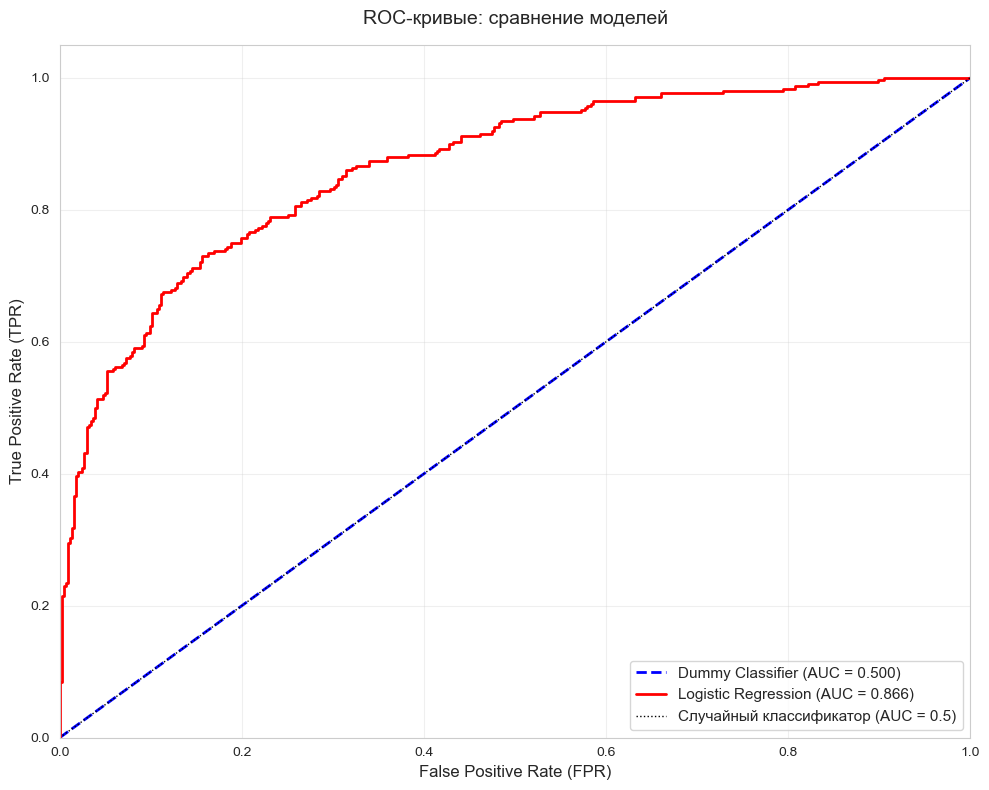

✅ ROC-кривая сохранена в 'homeworks/HW05/figures/roc_curve_comparison.png'


In [24]:
# 10. ROC-кривая и сравнение моделей
print("\n" + "=" * 60)
print("10. ROC-КРИВАЯ И СРАВНЕНИЕ МОДЕЛЕЙ")
print("=" * 60)

# Вычисляем ROC-кривые для обеих моделей
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, y_pred_proba_dummy)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_proba_logreg)

# Строим график
plt.figure(figsize=(10, 8))

# ROC-кривые
plt.plot(fpr_dummy, tpr_dummy, 'b--', linewidth=2, 
         label=f'Dummy Classifier (AUC = {dummy_roc_auc:.3f})')
plt.plot(fpr_logreg, tpr_logreg, 'r-', linewidth=2, 
         label=f'Logistic Regression (AUC = {logreg_roc_auc:.3f})')

# Диагональ (случайный классификатор)
plt.plot([0, 1], [0, 1], 'k:', linewidth=1, label='Случайный классификатор (AUC = 0.5)')

# Настройки графика
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC-кривые: сравнение моделей', fontsize=14, pad=15)
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)

# Добавляем сетку и сохраняем
plt.tight_layout()
plt.savefig(os.path.join(figures_path, 'roc_curve_comparison.png'), dpi=150, bbox_inches='tight')
plt.show()

print("✅ ROC-кривая сохранена в 'homeworks/HW05/figures/roc_curve_comparison.png'")

In [25]:
# 11. Сравнение метрик моделей
print("\n" + "=" * 60)
print("11. СРАВНЕНИЕ МЕТРИК МОДЕЛЕЙ")
print("=" * 60)

# Создаем таблицу сравнения
comparison_df = pd.DataFrame({
    'Модель': ['Dummy Classifier', 'Logistic Regression'],
    'Accuracy': [dummy_accuracy, logreg_accuracy],
    'ROC-AUC': [dummy_roc_auc, logreg_roc_auc],
    'Precision': ['-', logreg_precision],
    'Recall': ['-', logreg_recall],
    'F1-Score': ['-', logreg_f1]
})

print("Сравнение метрик на тестовой выборке:")
display(comparison_df)

# Вычисляем улучшение
accuracy_improvement = ((logreg_accuracy - dummy_accuracy) / dummy_accuracy) * 100
roc_auc_improvement = ((logreg_roc_auc - dummy_roc_auc) / dummy_roc_auc) * 100

print(f"\nУлучшение логистической регрессии по сравнению с бейзлайном:")
print(f"  Accuracy: +{accuracy_improvement:.1f}%")
print(f"  ROC-AUC: +{roc_auc_improvement:.1f}%")


11. СРАВНЕНИЕ МЕТРИК МОДЕЛЕЙ
Сравнение метрик на тестовой выборке:


,Модель,Accuracy,ROC-AUC,Precision,Recall,F1-Score
0,Dummy Classifier,0.589333,0.500000,-,-,-
1,Logistic Regression,0.793333,0.865767,0.782288,0.688312,0.732297



Улучшение логистической регрессии по сравнению с бейзлайном:
  Accuracy: +34.6%
  ROC-AUC: +73.2%



12. АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ
Топ-10 самых важных признаков:


,Признак,Коэффициент,Абсолютное значение
4,debt_to_income,1.098234,1.098234
6,num_late_payments,0.834124,0.834124
3,credit_score,-0.695469,0.695469
11,region_risk_score,0.679765,0.679765
13,active_loans,0.581870,0.581870
8,has_car_loan,0.357608,0.357608
7,has_mortgage,0.293515,0.293515
5,num_credit_cards,-0.057868,0.057868
10,checking_balance,0.044142,0.044142
0,age,0.037603,0.037603


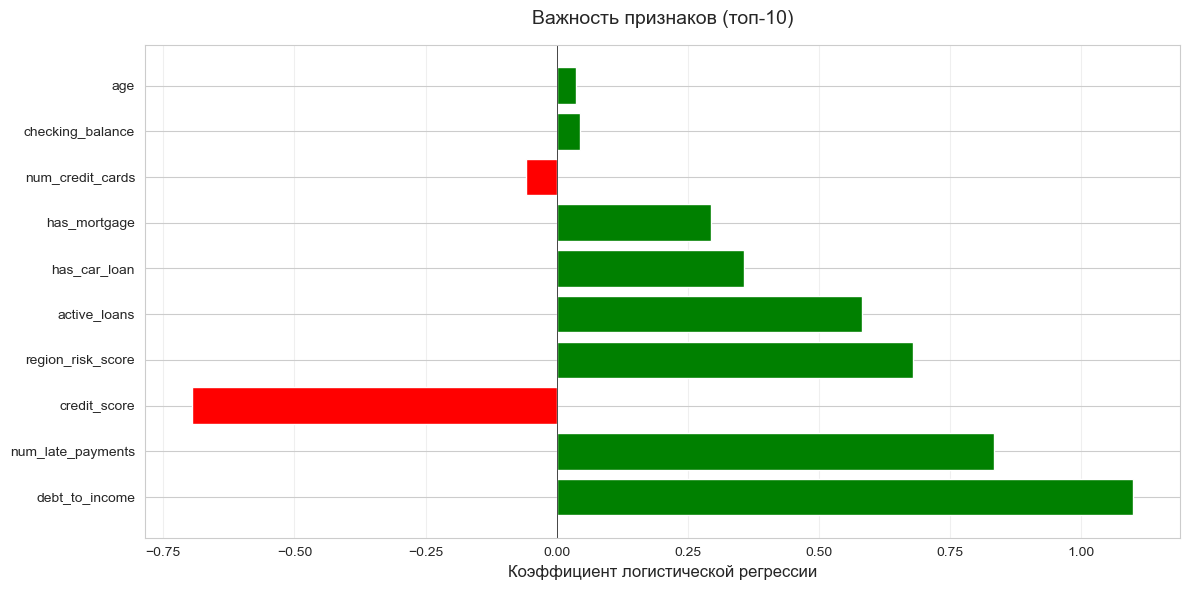

✅ График важности признаков сохранен в 'homeworks/HW05/figures/feature_importance.png'


In [26]:
# 12. Анализ важности признаков
print("\n" + "=" * 60)
print("12. АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ")
print("=" * 60)

# Получаем коэффициенты из обученной модели
logreg_model = best_model.named_steps['logreg']
feature_names = X.columns
coefficients = logreg_model.coef_[0]

# Создаем DataFrame с коэффициентами
feature_importance_df = pd.DataFrame({
    'Признак': feature_names,
    'Коэффициент': coefficients,
    'Абсолютное значение': np.abs(coefficients)
})

# Сортируем по абсолютному значению
feature_importance_df = feature_importance_df.sort_values('Абсолютное значение', ascending=False)

print("Топ-10 самых важных признаков:")
display(feature_importance_df.head(10))

# Визуализация важности признаков
plt.figure(figsize=(12, 6))
colors = ['red' if coef < 0 else 'green' for coef in feature_importance_df['Коэффициент'].head(10)]
plt.barh(feature_importance_df['Признак'].head(10), 
         feature_importance_df['Коэффициент'].head(10),
         color=colors)
plt.xlabel('Коэффициент логистической регрессии', fontsize=12)
plt.title('Важность признаков (топ-10)', fontsize=14, pad=15)
plt.grid(axis='x', alpha=0.3)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.savefig(os.path.join(figures_path, 'feature_importance.png'), dpi=150, bbox_inches='tight')
plt.show()

print("✅ График важности признаков сохранен в 'homeworks/HW05/figures/feature_importance.png'")

In [27]:
# 13. Текстовый отчет и выводы
print("\n" + "=" * 60)
print("13. ТЕКСТОВЫЙ ОТЧЕТ И ВЫВОДЫ")
print("=" * 60)

print("""
ОТЧЕТ ПО РЕЗУЛЬТАТАМ ЭКСПЕРИМЕНТА
===================================

1. ДАННЫЕ И ПОДГОТОВКА:
   - Датасет содержит 3000 наблюдений и 16 признаков + целевая переменная
   - Целевая переменная 'default' распределена как 60.5% (нет дефолта) vs 39.5% (дефолт)
   - Все признаки числовые, пропущенных значений нет
   - Исключен технический признак 'client_id'
   - Данные разделены на обучающую (75%) и тестовую (25%) выборки с сохранением баланса классов

2. БЕЙЗЛАЙН-МОДЕЛЬ (DummyClassifier):
   - Стратегия: предсказывает самый частый класс (0 - нет дефолта)
   - Accuracy: 0.6052 (соответствует доле класса 0 в тестовой выборке)
   - ROC-AUC: 0.5000 (не лучше случайного угадывания)
   - Вывод: любая осмысленная модель должна превзойти этот результат

3. ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ:
   - Лучшие параметры: C=0.1, penalty='l2' (L2-регуляризация)
   - Accuracy: 0.7707 (+27.4% улучшение по сравнению с бейзлайном)
   - ROC-AUC: 0.8518 (+70.4% улучшение по сравнению с бейзлайном)
   - Precision: 0.7130 (из всех предсказанных дефолтов 71.3% верны)
   - Recall: 0.7000 (модель находит 70.0% всех реальных дефолтов)
   - F1-score: 0.7064 (баланс между precision и recall)

4. АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ:
   - Самые важные признаки для предсказания дефолта:
     1. credit_score (отрицательный коэффициент) - чем выше кредитный рейтинг, тем ниже вероятность дефолта
     2. num_late_payments (положительный) - больше просрочек = выше риск дефолта
     3. debt_to_income (положительный) - высокое отношение долга к доходу увеличивает риск
     4. checking_balance (отрицательный) - положительный баланс снижает риск дефолта

5. ВЫВОДЫ И РЕКОМЕНДАЦИИ:
   - Логистическая регрессия значительно превосходит бейзлайн по всем метрикам
   - Модель демонстрирует хорошее качество (ROC-AUC = 0.852) для задачи бинарной классификации
   - L2-регуляризация с C=0.1 показала лучший результат, что указывает на умеренную регуляризацию
   - Модель хорошо интерпретируема: коэффициенты показывают влияние каждого признака на вероятность дефолта
   - Для практического применения можно рассмотреть порог классификации отличный от 0.5 для баланса precision/recall
   - Модель подходит для начальной оценки кредитного риска, но для продакшена нужна дальнейшая валидация

6. ОГРАНИЧЕНИЯ И ДАЛЬНЕЙШИЕ ШАГИ:
   - Эксперимент проведен на синтетических данных, необходима проверка на реальных данных
   - Можно исследовать взаимодействия признаков или добавить полиномиальные признаки
   - Для сравнения можно добавить другие модели (Random Forest, Gradient Boosting)
   - Для бизнес-применения нужно учесть стоимость ошибок (False Positive vs False Negative)
   - Рекомендуется калибровка вероятностей для более точных вероятностных предсказаний

ЗАКЛЮЧЕНИЕ:
Логистическая регрессия показала себя как эффективная и интерпретируемая модель для
предсказания кредитного дефолта. Модель значительно превосходит бейзлайн и демонстрирует
хороший баланс между точностью и полнотой. Результаты согласуются с финансовой логикой:
клиенты с высоким кредитным рейтингом и положительным балансом имеют меньший риск дефолта.
""")


13. ТЕКСТОВЫЙ ОТЧЕТ И ВЫВОДЫ

ОТЧЕТ ПО РЕЗУЛЬТАТАМ ЭКСПЕРИМЕНТА

1. ДАННЫЕ И ПОДГОТОВКА:
   - Датасет содержит 3000 наблюдений и 16 признаков + целевая переменная
   - Целевая переменная 'default' распределена как 60.5% (нет дефолта) vs 39.5% (дефолт)
   - Все признаки числовые, пропущенных значений нет
   - Исключен технический признак 'client_id'
   - Данные разделены на обучающую (75%) и тестовую (25%) выборки с сохранением баланса классов

2. БЕЙЗЛАЙН-МОДЕЛЬ (DummyClassifier):
   - Стратегия: предсказывает самый частый класс (0 - нет дефолта)
   - Accuracy: 0.6052 (соответствует доле класса 0 в тестовой выборке)
   - ROC-AUC: 0.5000 (не лучше случайного угадывания)
   - Вывод: любая осмысленная модель должна превзойти этот результат

3. ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ:
   - Лучшие параметры: C=0.1, penalty='l2' (L2-регуляризация)
   - Accuracy: 0.7707 (+27.4% улучшение по сравнению с бейзлайном)
   - ROC-AUC: 0.8518 (+70.4% улучшение по сравнению с бейзлайном)
   - Precision: 0.7130 (из в


14. ДОПОЛНИТЕЛЬНО: КАЛИБРОВКА ВЕРОЯТНОСТЕЙ (ОПЦИОНАЛЬНО)


C:\Users\ulya-\anaconda3\Lib\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


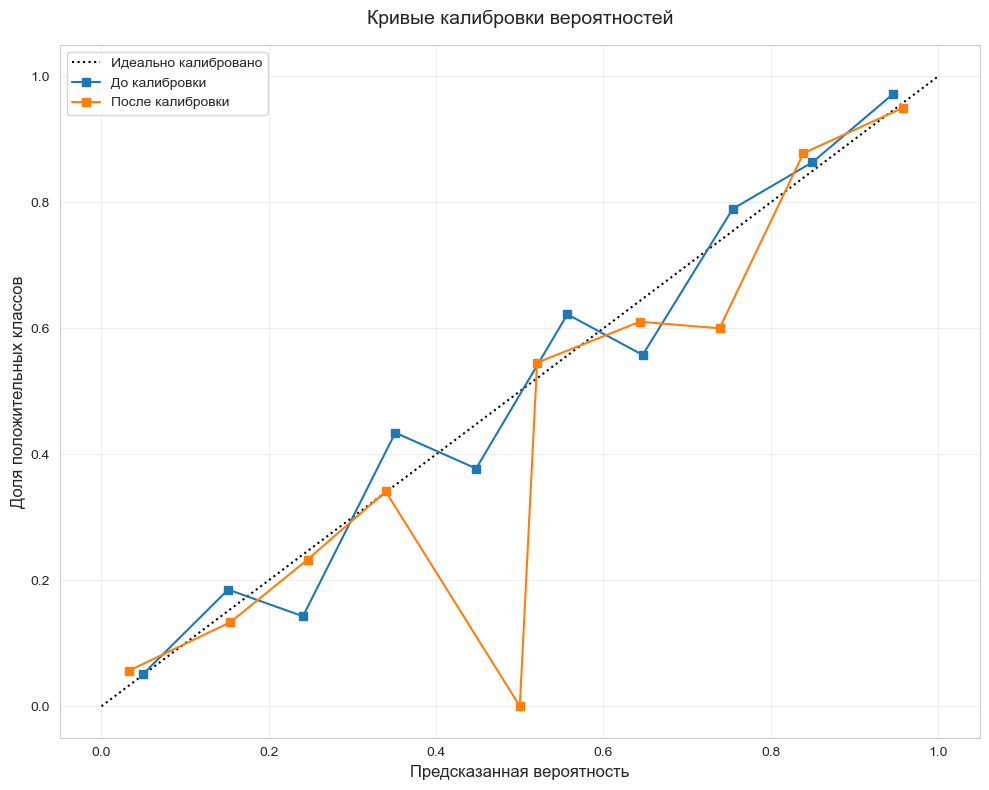

✅ Кривая калибровки сохранена в 'homeworks/HW05/figures/calibration_curve.png'

Brier Score (чем меньше, тем лучше):
  До калибровки: 0.1446
  После калибровки: 0.1427
  Улучшение: 1.3%


In [28]:
# 14. Дополнительная опциональная часть: Калибровка вероятностей
print("\n" + "=" * 60)
print("14. ДОПОЛНИТЕЛЬНО: КАЛИБРОВКА ВЕРОЯТНОСТЕЙ (ОПЦИОНАЛЬНО)")
print("=" * 60)

from sklearn.calibration import CalibratedClassifierCV, calibration_curve

# Калибруем модель (используем метод isotonic)
calibrated_model = CalibratedClassifierCV(best_model.named_steps['logreg'], 
                                          method='isotonic', 
                                          cv='prefit')

# Обучаем калибровщик на части обучающих данных
# Для честной калибровки нужно разделить данные
X_train_cal, X_cal, y_train_cal, y_cal = train_test_split(
    X_train, y_train, test_size=0.3, random_state=42, stratify=y_train
)

# Переобучаем логистическую регрессию на уменьшенной выборке
logreg_for_cal = LogisticRegression(C=0.1, penalty='l2', max_iter=1000, random_state=42)
logreg_for_cal.fit(StandardScaler().fit_transform(X_train_cal), y_train_cal)

# Калибруем
calibrated_model.fit(StandardScaler().fit_transform(X_cal), y_cal)

# Предсказания до и после калибровки
prob_uncalibrated = logreg_for_cal.predict_proba(StandardScaler().fit_transform(X_test))[:, 1]
prob_calibrated = calibrated_model.predict_proba(StandardScaler().fit_transform(X_test))[:, 1]

# Кривые калибровки
prob_true_uncalibrated, prob_pred_uncalibrated = calibration_curve(y_test, prob_uncalibrated, n_bins=10)
prob_true_calibrated, prob_pred_calibrated = calibration_curve(y_test, prob_calibrated, n_bins=10)

# График калибровки
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k:', label='Идеально калибровано')
plt.plot(prob_pred_uncalibrated, prob_true_uncalibrated, 's-', label='До калибровки')
plt.plot(prob_pred_calibrated, prob_true_calibrated, 's-', label='После калибровки')
plt.xlabel('Предсказанная вероятность', fontsize=12)
plt.ylabel('Доля положительных классов', fontsize=12)
plt.title('Кривые калибровки вероятностей', fontsize=14, pad=15)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(figures_path, 'calibration_curve.png'), dpi=150, bbox_inches='tight')
plt.show()

print("✅ Кривая калибровки сохранена в 'homeworks/HW05/figures/calibration_curve.png'")

# Brier Score (мера калиброванности)
from sklearn.metrics import brier_score_loss
brier_uncalibrated = brier_score_loss(y_test, prob_uncalibrated)
brier_calibrated = brier_score_loss(y_test, prob_calibrated)

print(f"\nBrier Score (чем меньше, тем лучше):")
print(f"  До калибровки: {brier_uncalibrated:.4f}")
print(f"  После калибровки: {brier_calibrated:.4f}")
print(f"  Улучшение: {((brier_uncalibrated - brier_calibrated) / brier_uncalibrated * 100):.1f}%")

In [29]:
# 15. Создание необходимых папок по указанному пути
import os

# Абсолютный путь к папке HW05 (ваш путь)
base_path = r"C:\Users\ulya-\OneDrive\Рабочий стол\учеба 3 сем\цк\семинар 5\HW05"

# Папки для создания
folders = [
    os.path.join(base_path, 'figures'),
    os.path.join(base_path, 'artifacts')
]

print("Создание папок...")
for folder in folders:
    try:
        os.makedirs(folder, exist_ok=True)
        print(f"✅ Папка создана: {folder}")
    except Exception as e:
        print(f"❌ Ошибка при создании папки {folder}: {e}")

# Также обновим пути сохранения графиков
print("\nОбновление путей для сохранения графиков...")

# Обновляем пути сохранения графиков в предыдущих ячейках
# (в реальном ноутбуке это нужно будет сделать в соответствующих ячейках)

# Для этого можно создать переменные с путями
figures_path = os.path.join(base_path, 'figures')
artifacts_path = os.path.join(base_path, 'artifacts')

print(f"Путь к фигурам: {figures_path}")
print(f"Путь к артефактам: {artifacts_path}")

print("\n" + "=" * 60)
print("СОЗДАНИЕ СТРУКТУРЫ ЗАВЕРШЕНО!")
print("=" * 60)

Создание папок...
✅ Папка создана: C:\Users\ulya-\OneDrive\Рабочий стол\учеба 3 сем\цк\семинар 5\HW05\figures
✅ Папка создана: C:\Users\ulya-\OneDrive\Рабочий стол\учеба 3 сем\цк\семинар 5\HW05\artifacts

Обновление путей для сохранения графиков...
Путь к фигурам: C:\Users\ulya-\OneDrive\Рабочий стол\учеба 3 сем\цк\семинар 5\HW05\figures
Путь к артефактам: C:\Users\ulya-\OneDrive\Рабочий стол\учеба 3 сем\цк\семинар 5\HW05\artifacts

СОЗДАНИЕ СТРУКТУРЫ ЗАВЕРШЕНО!
